In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### load data

In [2]:

# read csv
filepath = './data/players-stats-epl-2022.csv'
df = pd.read_csv(filepath)

df.tail(5)

,first_name,last_name,age,nationality,height_cm,weight_kg,team_name,league_name,season,game_appearances,...,fouls_drawn,fouls_committed,cards_yellow,cards_yellowred,cards_red,penalty_won,penalty_committed,penalty_scored,penalty_missed,penalty_saved
1115,Carney Chibueze,Chukwuemeka,21.0,England,187 cm,77 kg,Aston Villa,Premier League,2022,0.0,...,5.0,2.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN
1116,Daniel William John,Ings,32.0,England,178 cm,73 kg,Aston Villa,Premier League,2022,18.0,...,5.0,8.0,3.0,0.0,0.0,NaN,NaN,2.0,0.0,NaN
1117,Jhon Jader,Durán Palacio,21.0,Colombia,185 cm,73 kg,Aston Villa,Premier League,2022,12.0,...,3.0,9.0,1.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN
1118,Timothy Emeka,Iroegbunam,21.0,England,183 cm,NaN,Aston Villa,Premier League,2022,0.0,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN
1119,Oliver George Arthur,Watkins,29.0,England,180 cm,70 kg,Aston Villa,Premier League,2022,37.0,...,39.0,26.0,4.0,0.0,0.0,NaN,NaN,1.0,1.0,NaN


In [3]:
df.shape

(1120, 43)

In [4]:
df.duplicated().sum()

716

In [5]:
df = df.drop_duplicates()

df.shape

(404, 43)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 0 to 1079
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   first_name             404 non-null    object 
 1   last_name              404 non-null    object 
 2   age                    402 non-null    float64
 3   nationality            404 non-null    object 
 4   height_cm              313 non-null    object 
 5   weight_kg              271 non-null    object 
 6   team_name              404 non-null    object 
 7   league_name            404 non-null    object 
 8   season                 404 non-null    int64  
 9   game_appearances       370 non-null    float64
 10  game_lineups           370 non-null    float64
 11  game_minutes           370 non-null    float64
 12  game_number            0 non-null      float64
 13  game_position          404 non-null    object 
 14  game_rating            221 non-null    float64
 15  game_capta

In [7]:
# Find columns with full NA values
columns_with_full_na = df.columns[df.isna().all()].tolist()

columns_with_full_na

['game_number', 'dribble_past', 'penalty_won', 'penalty_committed']

In [8]:
df_cleaned = df.drop(columns_with_full_na, axis = 1)

In [9]:
df_cleaned.shape

(404, 39)

In [10]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 0 to 1079
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   first_name             404 non-null    object 
 1   last_name              404 non-null    object 
 2   age                    402 non-null    float64
 3   nationality            404 non-null    object 
 4   height_cm              313 non-null    object 
 5   weight_kg              271 non-null    object 
 6   team_name              404 non-null    object 
 7   league_name            404 non-null    object 
 8   season                 404 non-null    int64  
 9   game_appearances       370 non-null    float64
 10  game_lineups           370 non-null    float64
 11  game_minutes           370 non-null    float64
 12  game_position          404 non-null    object 
 13  game_rating            221 non-null    float64
 14  game_captain           404 non-null    bool   
 15  shots_tota

In [11]:
df_cleaned.isna().all()

first_name               False
last_name                False
age                      False
nationality              False
height_cm                False
weight_kg                False
team_name                False
league_name              False
season                   False
game_appearances         False
game_lineups             False
game_minutes             False
game_position            False
game_rating              False
game_captain             False
shots_total              False
shots_on                 False
goals_total              False
goals_conceded           False
goals_assists            False
goals_saves              False
passes_total             False
passes_key               False
passes_accuracy          False
tackles_total            False
tackles_blocks           False
tackles_interceptions    False
duels_total              False
duels_won                False
dribble_attempts         False
dribble_success          False
fouls_drawn              False
fouls_co

In [12]:
filepath = "./data/data_cleaned.csv"
df.to_csv(filepath, index=False)

In [13]:
# clean the weight and height columns

df_cleaned["weight_kg"] = df_cleaned['weight_kg'].str.replace('kg', '')
df_cleaned["weight_kg"] = pd.to_numeric(df_cleaned["weight_kg"], errors='coerce')
df_cleaned["height_cm"] = df_cleaned['height_cm'].str.replace('cm', '')
df_cleaned["height_cm"] = pd.to_numeric(df_cleaned["height_cm"], errors='coerce')

df_cleaned.head()

,first_name,last_name,age,nationality,height_cm,weight_kg,team_name,league_name,season,game_appearances,...,dribble_attempts,dribble_success,fouls_drawn,fouls_committed,cards_yellow,cards_yellowred,cards_red,penalty_scored,penalty_missed,penalty_saved
0,Lee,Grant,39.0,England,193.0,83.0,Manchester United,Premier League,2022,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tyler,Fredricson,17.0,England,NaN,NaN,Manchester United,Premier League,2022,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Björn Bryan,Hardley,20.0,Netherlands,189.0,NaN,Manchester United,Premier League,2022,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sam,Murray,18.0,England,NaN,NaN,Manchester United,Premier League,2022,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,David,de Gea Quintana,33.0,Spain,192.0,76.0,Manchester United,Premier League,2022,38.0,...,NaN,NaN,5.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 0 to 1079
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   first_name             404 non-null    object 
 1   last_name              404 non-null    object 
 2   age                    402 non-null    float64
 3   nationality            404 non-null    object 
 4   height_cm              311 non-null    float64
 5   weight_kg              269 non-null    float64
 6   team_name              404 non-null    object 
 7   league_name            404 non-null    object 
 8   season                 404 non-null    int64  
 9   game_appearances       370 non-null    float64
 10  game_lineups           370 non-null    float64
 11  game_minutes           370 non-null    float64
 12  game_position          404 non-null    object 
 13  game_rating            221 non-null    float64
 14  game_captain           404 non-null    bool   
 15  shots_tota

In [15]:

# Total goals
total_goals = df_cleaned['goals_total'].sum()

# total shots on target
total_shots_on_target = df["shots_on"].sum()

print(f"Out of {total_shots_on_target} shots on target {total_goals} were turned to goals.")


Out of 1728.0 shots on target 559.0 were turned to goals.


In [16]:
# total penalty goals
total_penalty_goals = df_cleaned['penalty_scored'].sum()
total_penalty_missed = df_cleaned['penalty_missed'].sum()
total_penalty_saved = df_cleaned['penalty_missed'].sum()

print(f"Total Penalty goals : {total_penalty_goals}, Total penalty missed: {total_penalty_missed}, Total penalty saved: {total_penalty_saved}")  

Total Penalty goals : 54.0, Total penalty missed: 16.0, Total penalty saved: 16.0


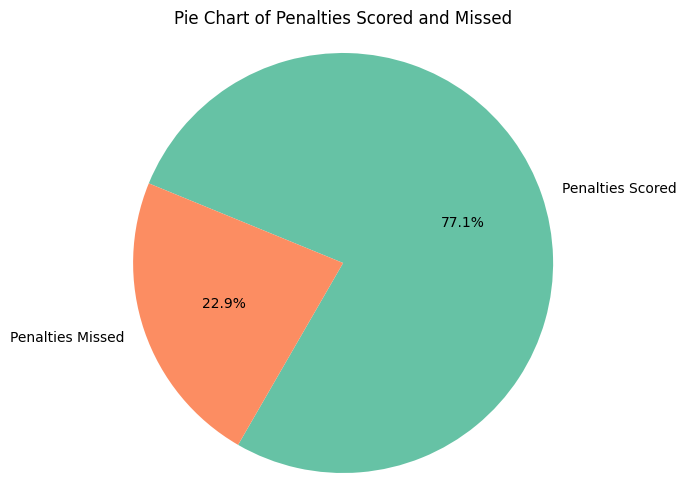

In [17]:
# pie chart

data = [ total_penalty_goals, total_penalty_missed]
labels = [ "Penalties Scored", "Penalties Missed"]
color = sns.color_palette("Set2")
# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(data, labels=labels, colors=color,autopct='%1.1f%%', startangle=240)
plt.title('Pie Chart of Penalties Scored and Missed')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



In [18]:

# unique positions

df_cleaned['game_position'].unique()


array(['Goalkeeper', 'Defender', 'Midfielder', 'Attacker'], dtype=object)

In [19]:
# total players playing in as attackers

total_attackers = (df_cleaned['game_position'] == 'Attacker').sum()

total_midfielders = (df_cleaned['game_position'] == 'Midfielder').sum()

total_defenders = (df_cleaned['game_position'] == 'Defender').sum()

total_goalkeepers = (df_cleaned['game_position'] == 'Goalkeeper').sum()


print(f' Total Attackers : {total_attackers} \n Total Midfielders : {total_midfielders} \n Total Defenders : {total_defenders} \n Total Goal Keepers : {total_goalkeepers} \n  ')

 Total Attackers : 94 
 Total Midfielders : 160 
 Total Defenders : 114 
 Total Goal Keepers : 36 
  


In [20]:
# total nationalities

np.size(df_cleaned['nationality'].unique())

56

<Axes: xlabel='nationality'>

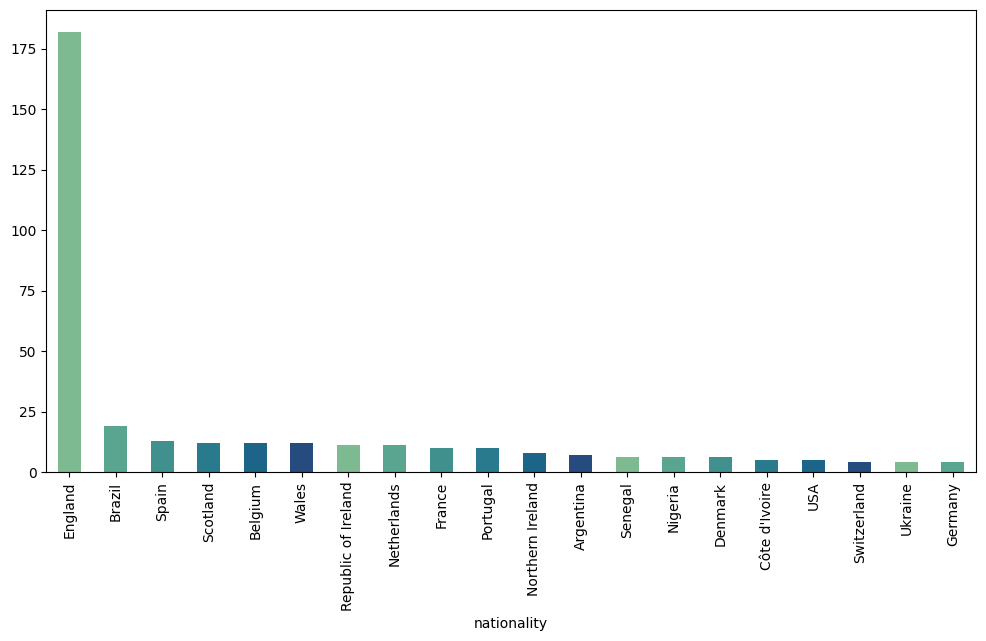

In [21]:
data_sort_by_nationality = df_cleaned.groupby('nationality').size().sort_values(ascending = False)
data_sort_by_nationality.head(20).plot(kind='bar', figsize=(12,6), color=sns.color_palette("crest")) 

Text(0.5, 1.0, 'Teams and Squad size')

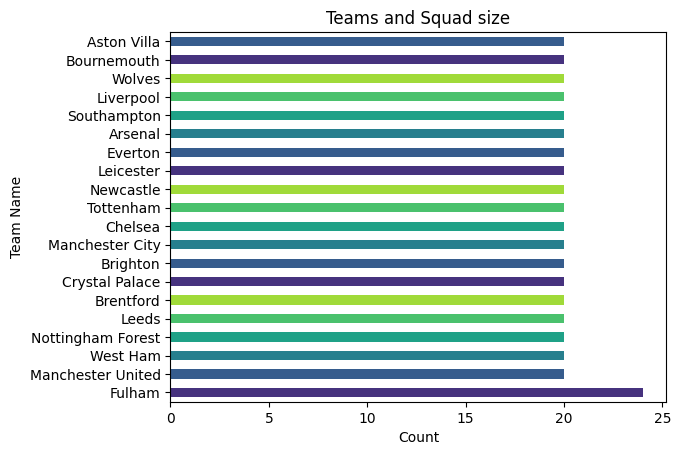

In [22]:

# clubs with most players in squad

df_cleaned['team_name'].unique()

ax = df_cleaned['team_name'].value_counts().plot(kind = 'barh', color=sns.color_palette("viridis"))

# Adding labels
ax.set_xlabel('Count')
ax.set_ylabel('Team Name')
ax.set_title('Teams and Squad size')


In [23]:
df_cleaned['age'].max()

df_cleaned['age'].min()

df_cleaned['age'].describe()

count    402.000000
mean      25.415423
std        5.204933
min       16.000000
25%       21.000000
50%       24.000000
75%       29.000000
max       42.000000
Name: age, dtype: float64

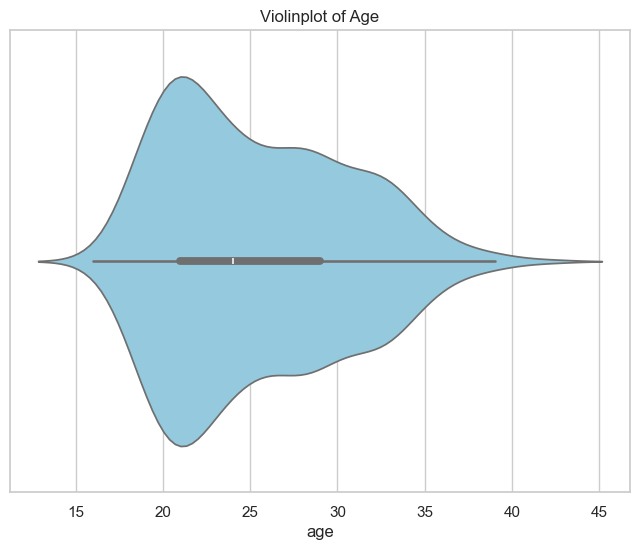

In [24]:
# Set the style
sns.set(style="whitegrid")

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the boxplot
sns.violinplot(data=df_cleaned, x='age', color='skyblue')

# Add a title
plt.title('Violinplot of Age')

# Show the plot
plt.show()

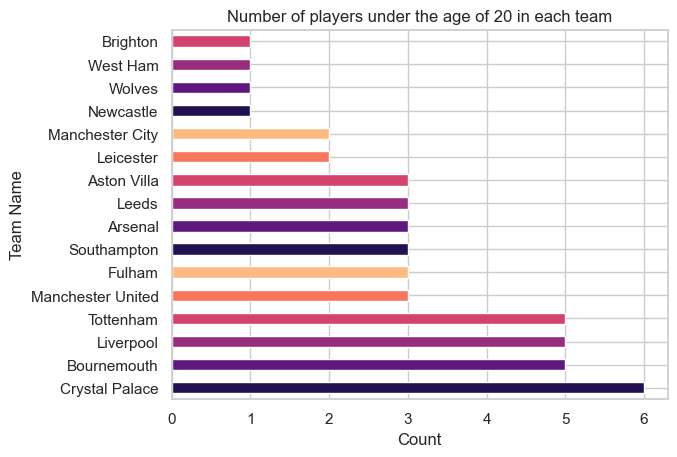

In [25]:
# total under 20 players in each 

under_20_players = df_cleaned[df_cleaned['age'] < 20]

# Assuming under_20_players is your DataFrame and 'team_name' is the column you want to plot
ax = under_20_players['team_name'].value_counts().plot(kind="barh", color=sns.color_palette("magma"))

# Adding labels
ax.set_xlabel('Count')
ax.set_ylabel('Team Name')
ax.set_title('Number of players under the age of 20 in each team')

# Setting x-axis tick labels to be integers
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

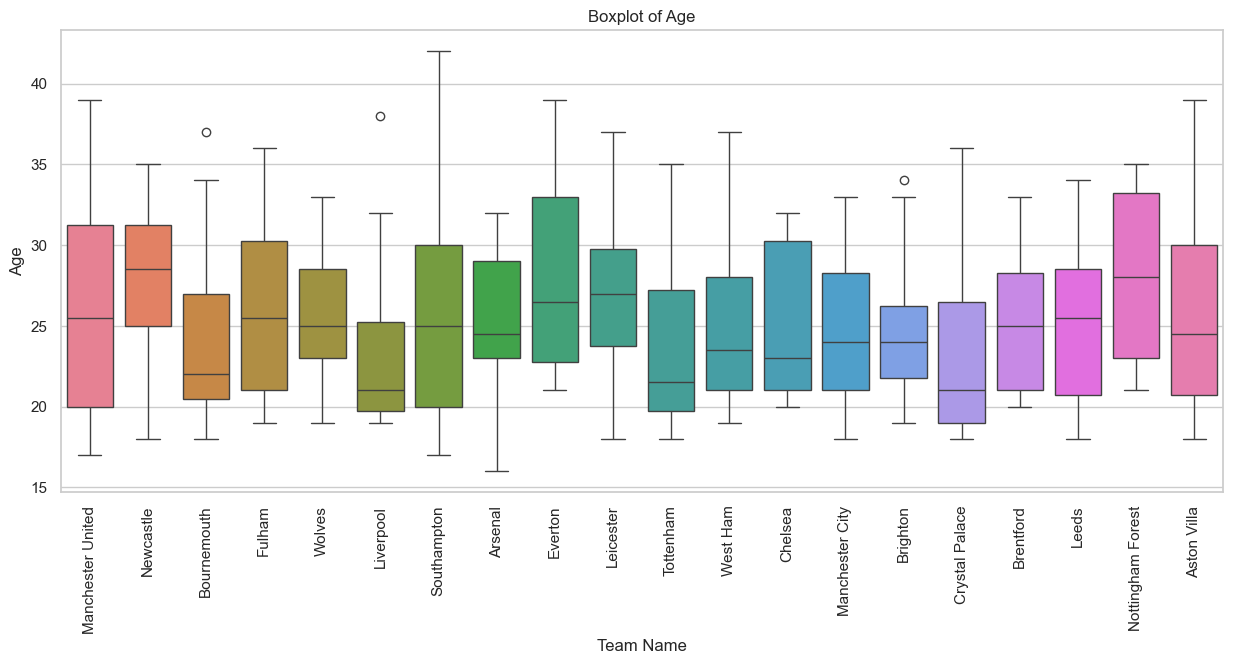

In [26]:
# average age of players in each club

# Set the figure size
plt.figure(figsize=(15, 6))

# Define a color palette with enough colors for each category in 'team_name'
palette = sns.color_palette("husl", len(df_cleaned['team_name'].unique()))

# Create the boxplot
sns.boxplot(data=df_cleaned, x='team_name', y='age', palette=palette, hue='team_name')

plt.xticks(rotation = 90)

# Add a title
plt.title('Boxplot of Age')
# Add x and y labels
plt.xlabel('Team Name')
plt.ylabel('Age')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Plot of Teams vs Total Assists')

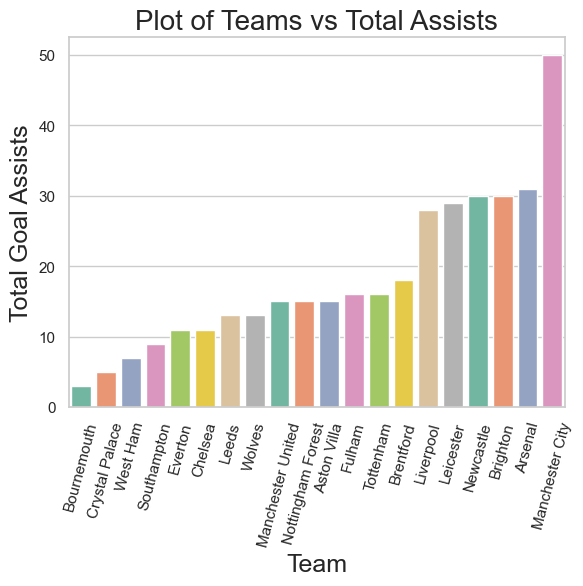

In [27]:

# groups dataframe by team and summarises the totall assists
total_assists_by_each_club = pd.DataFrame(df_cleaned.groupby('team_name', as_index=False) ['goals_assists'].sum())

# set the theme
sns.set_theme(style="whitegrid", color_codes=True) 

# plots the data in a df
ax = sns.barplot(x='team_name', y='goals_assists', data=total_assists_by_each_club.sort_values(by="goals_assists"), palette='Set2', hue="team_name") 

# set x and y axis labels
ax.set_xlabel("Team", fontsize=18) 
ax.set_ylabel("Total Goal Assists", fontsize=18) 

# rotates the x axis labels to avoid overlapping
plt.xticks(rotation=75) 

# adjusts the default size of figures created by Matplotlib
plt.rcParams["figure.figsize"] = (20,8) 

# set plot title
plt.title('Plot of Teams vs Total Assists', fontsize = 20)


In [28]:
# top 10 assists

top_10_assists = df_cleaned[['first_name', 'last_name', 'team_name', 'goals_assists', 'game_appearances']].nlargest(n=15, columns='goals_assists')

top_10_assists

,first_name,last_name,team_name,goals_assists,game_appearances
755,Kevin,De Bruyne,Manchester City,16.0,32.0
294,Mohamed,Salah Hamed Mahrous Ghaly,Liverpool,12.0,38.0
404,Bukayo Ayoyinka Temidayo,Saka,Arsenal,11.0,38.0
409,Leandro,Trossard,Arsenal,10.0,20.0
788,Leandro,Trossard,Brighton,10.0,16.0
292,Trent John,Alexander-Arnold,Liverpool,9.0,37.0
531,James Daniel,Maddison,Leicester,9.0,30.0
229,Morgan Anthony,Gibbs-White,Wolves,8.0,2.0
568,Ivan,Perišić,Tottenham,8.0,34.0
750,Erling,Braut Haaland,Manchester City,8.0,35.0


In [29]:
# top 10 goal scorers
top_10_goal_scorers = df_cleaned[['first_name', 'last_name', 'team_name', 'goals_total', 'game_appearances']].nlargest(n=15, columns='goals_total')

top_10_goal_scorers


,first_name,last_name,team_name,goals_total,game_appearances
750,Erling,Braut Haaland,Manchester City,36.0,35.0
912,Ivan Benjamin Elijah,Toney,Brentford,20.0,33.0
294,Mohamed,Salah Hamed Mahrous Ghaly,Liverpool,19.0,38.0
64,Callum Eddie Graham,Wilson,Newcastle,18.0,31.0
15,Marcus,Rashford,Manchester United,17.0,35.0
419,Gabriel Teodoro,Martinelli Silva,Arsenal,15.0,36.0
1079,Oliver George Arthur,Watkins,Aston Villa,15.0,37.0
166,Aleksandar,Mitrović,Fulham,14.0,24.0
404,Bukayo Ayoyinka Temidayo,Saka,Arsenal,14.0,38.0
529,Harvey Lewis,Barnes,Leicester,13.0,34.0


Text(0.5, 1.0, 'Plot of Teams vs Total Goals Scored')

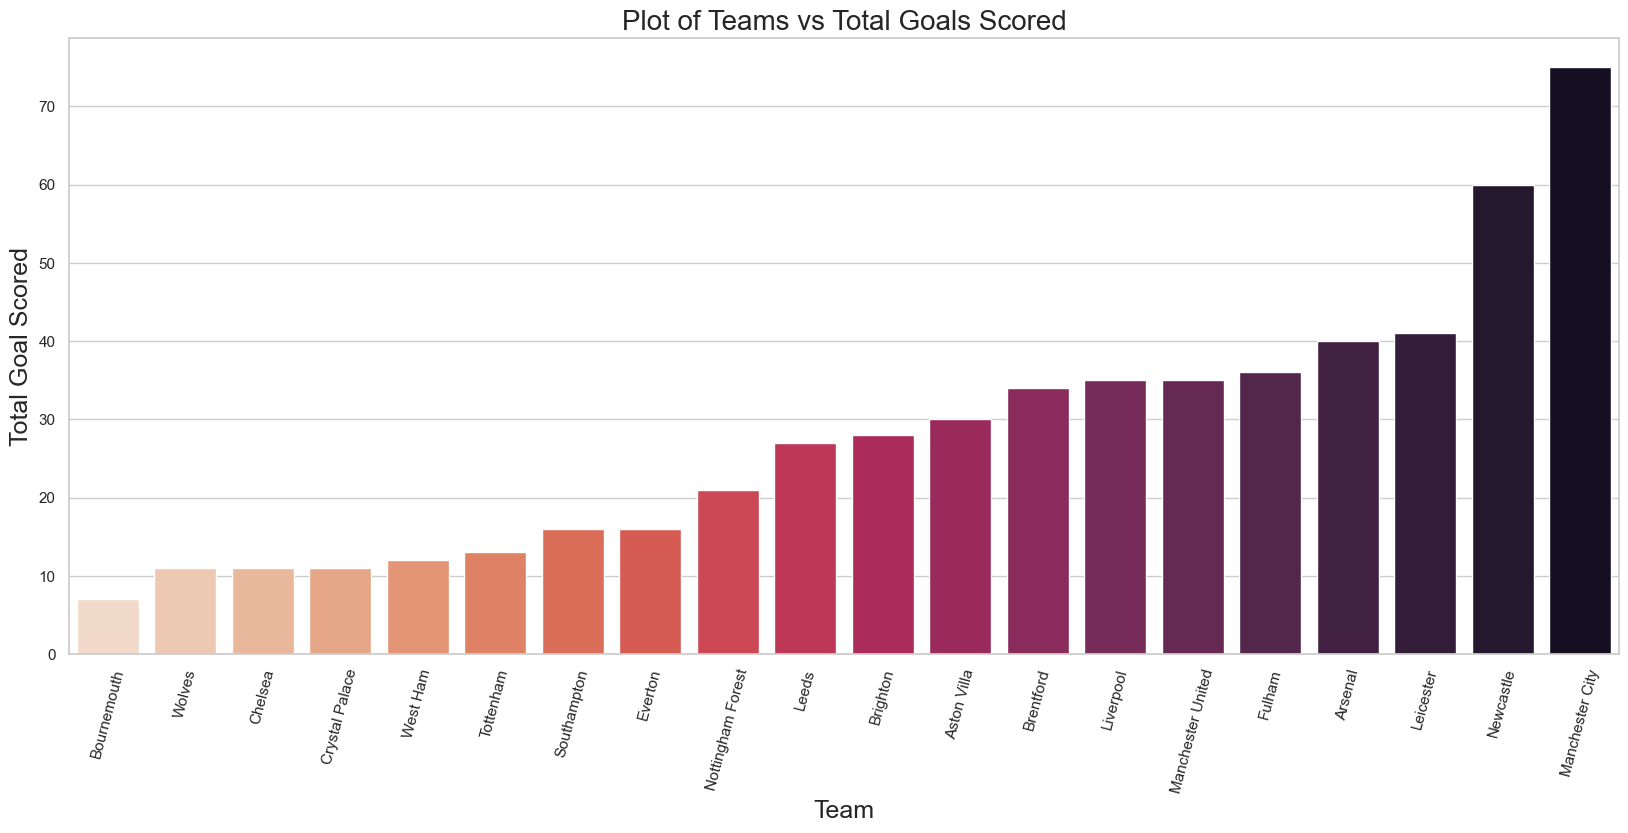

In [30]:
# groups dataframe by team and summarises the totall assists
total_goals_by_each_club = pd.DataFrame(df_cleaned.groupby('team_name', as_index=False) ['goals_total'].sum())

# set the theme
sns.set_theme(style="whitegrid", color_codes=True) 

# plots the data in a df
ax = sns.barplot(x='team_name', y='goals_total', data=total_goals_by_each_club.sort_values(by="goals_total"), palette='rocket_r', hue="team_name") 

# set x and y axis labels
ax.set_xlabel("Team", fontsize=18) 
ax.set_ylabel("Total Goal Scored", fontsize=18) 

# rotates the x axis labels to avoid overlapping
plt.xticks(rotation=75) 

# adjusts the default size of figures created by Matplotlib
plt.rcParams["figure.figsize"] = (20,8) 

# set plot title
plt.title('Plot of Teams vs Total Goals Scored', fontsize = 20)

In [31]:
df_cleaned[['height_cm', 'weight_kg']].describe()

,height_cm,weight_kg
count,311.000000,269.000000
mean,182.131833,75.542751
std,7.095568,7.723959
min,163.000000,55.000000
25%,177.000000,70.000000
50%,182.000000,75.000000
75%,188.000000,81.000000
max,201.000000,98.000000


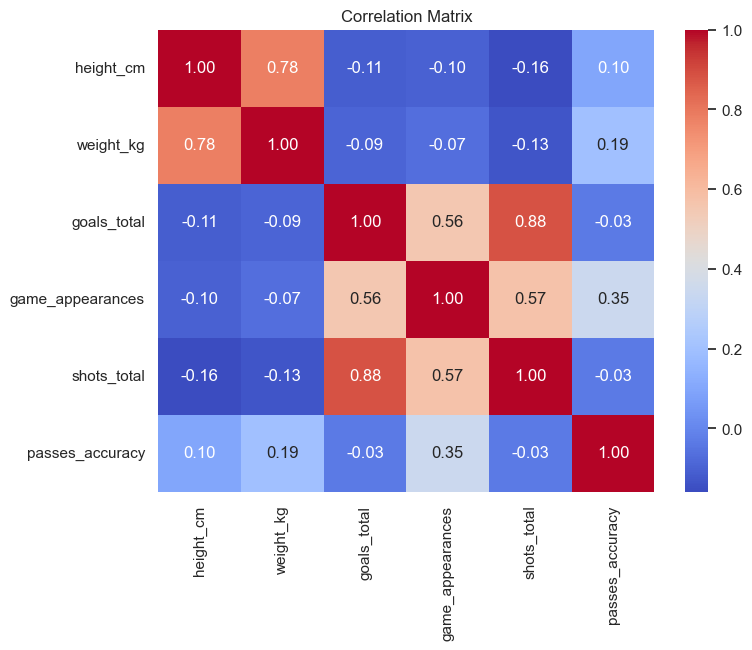

In [32]:



df_numeric_cols = df_cleaned[['height_cm', 'weight_kg', 'goals_total', 'game_appearances', 'shots_total', 'passes_accuracy']]

# get correlation matrix
correlation_matrix = df_numeric_cols.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Matrix')

# Show plot
plt.show()

In [44]:
top_rated_players = df_cleaned[['first_name', 'last_name', 'nationality', 'game_rating']].nlargest(n=10, columns='game_rating')
top_rated_players

,first_name,last_name,nationality,game_rating
755,Kevin,De Bruyne,Belgium,7.768750
750,Erling,Braut Haaland,Norway,7.397142
531,James Daniel,Maddison,England,7.340000
756,Rodrigo,Hernández Cascante,Spain,7.314285
757,Jack Peter,Grealish,England,7.310714
292,Trent John,Alexander-Arnold,England,7.305405
404,Bukayo Ayoyinka Temidayo,Saka,England,7.294736
912,Ivan Benjamin Elijah,Toney,England,7.287878
356,James Michael Edward,Ward-Prowse,England,7.263157
19,Carlos Henrique,Casimiro,Brazil,7.239285


<Axes: ylabel='nationality'>

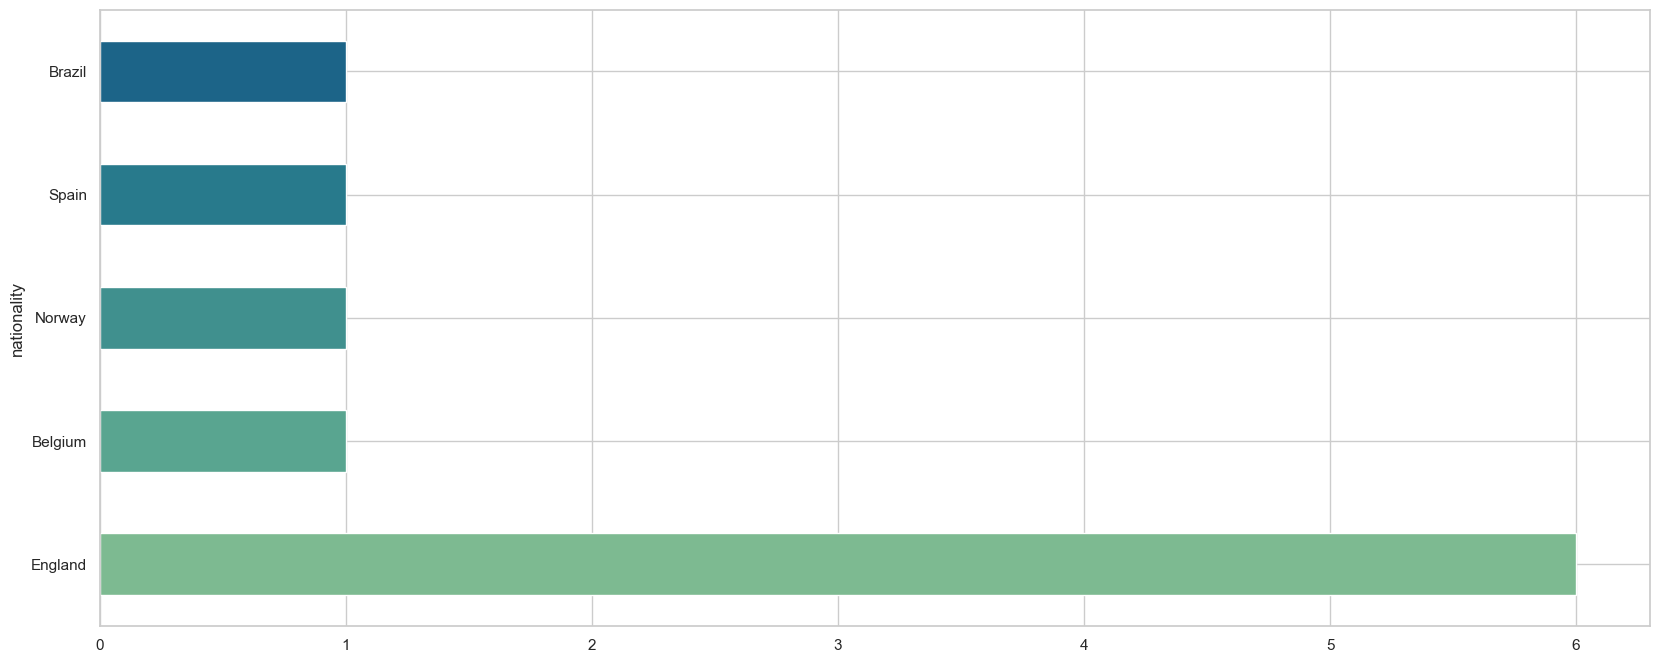

In [47]:
top_rated_players['nationality'].value_counts().plot(kind='barh', color=sns.color_palette("crest"))